## **Multiple Linear Regression**

- interest_rate - independent feature
- unemployment_rate - independent feature
- index_price - dependent feature
- This is a multiple linear regression problem as there are 2 input features and 1 output feature.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df_index = pd.read_csv('economic_index.csv')

In [ ]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# drop unnecessary columns
df_index.drop(columns = ['Unnamed: 0','year','month'], axis = 1, inplace = True)

In [ ]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


#### Check missing values

In [ ]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


#### <span style="color:red;">Obs:</span> There are no null values present in the dataset.


#### Visualization


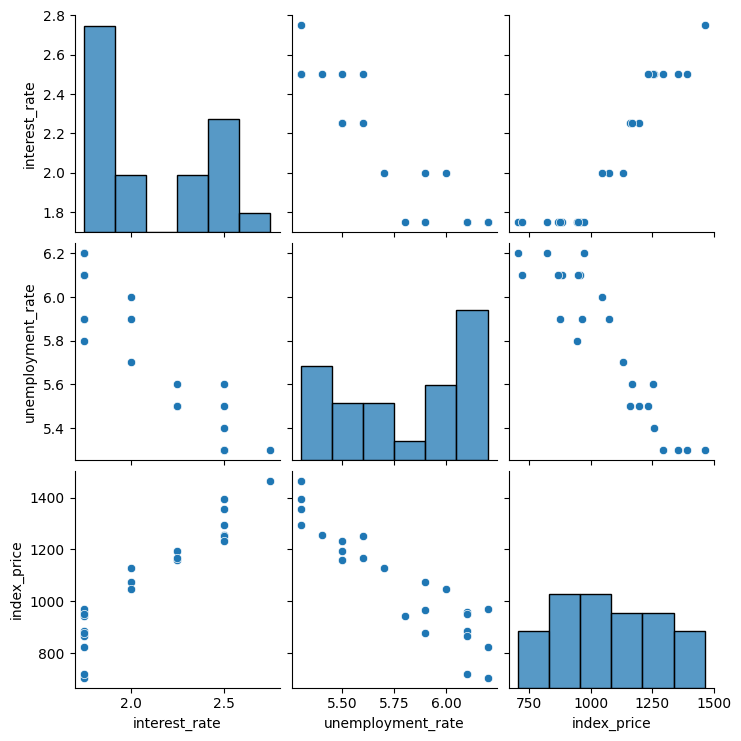

In [ ]:
sns.pairplot(df_index)

In [ ]:
# correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


#### <span style="color:red;">Obs:</span>
- Negative correlation between interest_rate and unemployment_rate.
- Positive correlation between interest_rate and index_price.

Text(0, 0.5, 'Unemployment rate')

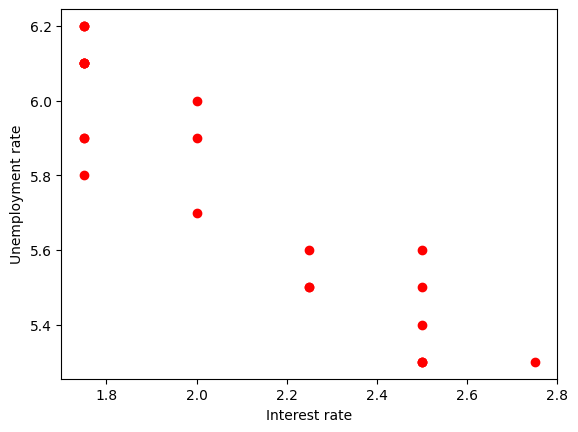

In [ ]:
# visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color = 'r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

### Steps to start with Multiple Linear Regression:

#### Step 1: Divide features into independent and dependent features

In [ ]:
# independent features
X = df_index[['interest_rate','unemployment_rate']]
             #OR
X = df_index.iloc[:,:-1]   # : (all rows), :-1 (all columns expect last column)

In [ ]:
# dependent feature
y = df_index['interest_rate']
              #OR
y = df_index.iloc[:,-1]    # : (all rows), -1 (only last column)

In [ ]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


#### Step 2: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

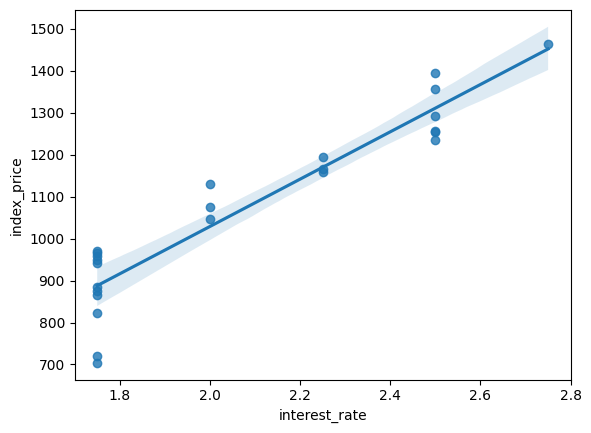

In [ ]:
# regression plot
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])

#### <span style="color:red;">Obs:</span> Graph is increasing as they are positively correlated.

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

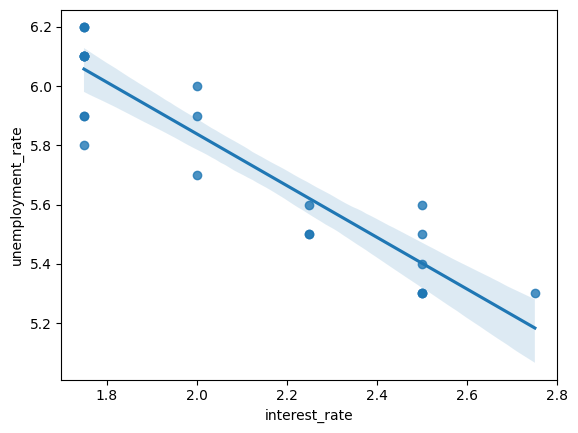

In [ ]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])

#### <span style="color:red;">Obs:</span> Graph is decreasing as they are negatively correlated.

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

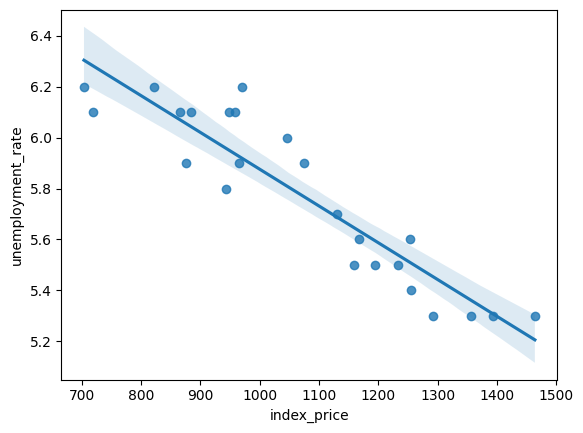

In [ ]:
sns.regplot(x = df_index['index_price'], y = df_index['unemployment_rate'])

#### <span style="color:red;">Obs:</span> Graph is decreasing as they are negatively correlated.


#### Step 3: Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [34]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

#### Step 4: Apply Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

#### Step 5: Perform Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [49]:
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [50]:
np.mean(validation_score)

-5914.828180162386

#### Step 6: Prediction for test data

In [51]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

#### Step 7: Check accuracy with Performance Metrics

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [57]:
score = r2_score(y_test, y_pred)
score

0.7591371539010257

In [58]:
# adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

#### Assumptions

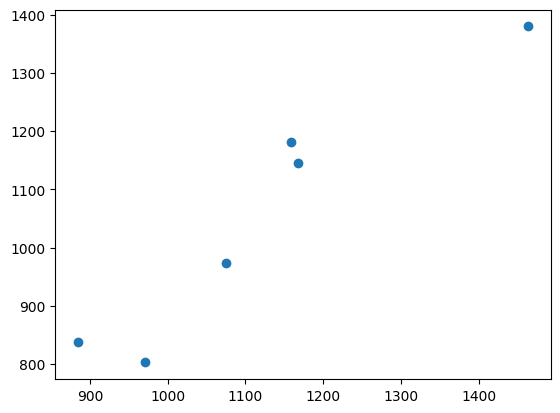

In [59]:
plt.scatter(y_test, y_pred)

#### <span style="color:red;">Obs:</span> As there is a linear relationship we can say that the model has performed well.

In [60]:
# Errors / Residuals
residuals = y_test - y_pred
residuals

,index_price
8,-21.746681
16,168.257203
0,84.165430
18,45.474004
11,101.146860
9,22.036518


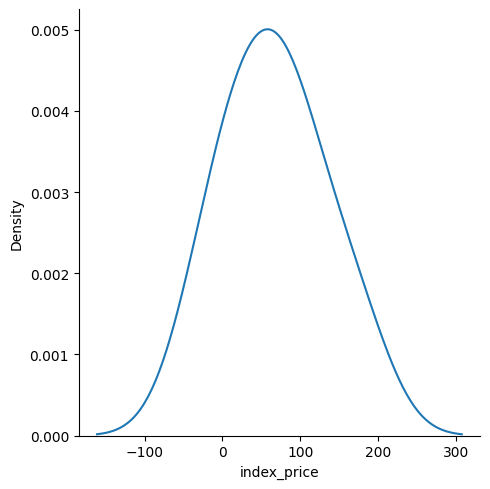

In [63]:
# Plotting Errors / Residuals
sns.displot(residuals, kind = 'kde')

#### <span style="color:red;">Obs:</span> If the graph is normal distribution we can say that the model is performing well.

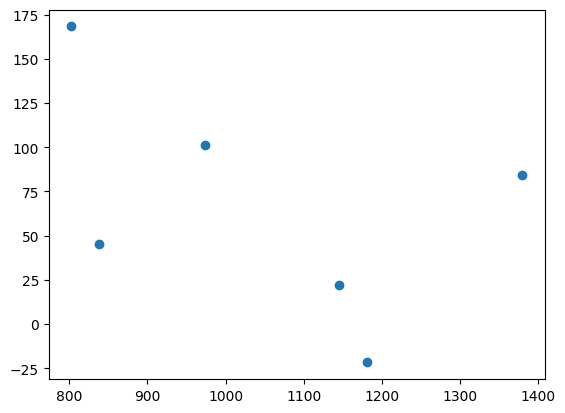

In [64]:
# scatter plot w.r.t prediction and residuals
plt.scatter(y_pred, residuals)

#### <span style="color:red;">Obs:</span> Data is uniformly distributed. It does not follow any pattern.

#### **Linear Regression with OLS**

In [65]:
import statsmodels.api as sm

In [66]:
model = sm.OLS(y_train, X_train).fit()

In [67]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                       0.754
Time:                        08:08:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(regression.coef_)

[  88.27275507 -116.25716066]
